In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Definisci il percorso e basta
percorso = '/content/drive/MyDrive/Brown/tabella sporco.xlsx'
print("✅ Collegamento pronto!")

Mounted at /content/drive
✅ Collegamento pronto!


In [2]:
df = pd.read_excel(percorso)
print("--- NOMI DELLE COLONNE ---")
print(df.columns.tolist())
print("\n--- COSA C'È DENTRO OGNI COLONNA? ---")
print(df.dtypes)

--- NOMI DELLE COLONNE ---
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

--- COSA C'È DENTRO OGNI COLONNA? ---
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object


In [3]:
import pandas as pd
from google.colab import drive

# 1. Montiamo il Drive (con il percorso che mi hai chiesto)
drive.mount('/content/drive')

# 2. Indirizzo preciso del file Excel
percorso = '/content/drive/MyDrive/Brown/tabella sporco.xlsx'

try:
    # 3. Leggiamo il libro Excel
    df = pd.read_excel(percorso)

    # 4. Chiediamo le informazioni a Python
    numero_righe = len(df)
    prezzo_min = df['Price'].min()
    prezzo_max = df['Price'].max()
    quantita_min = df['Quantity'].min()
    quantita_max = df['Quantity'].max()

    print("📊 --- RISULTATI DEL CONTROLLO ---")
    print(f"NUMERO TOTALE DI RIGHE: {numero_righe}")
    print("-" * 30)
    print(f"PREZZO (Price): Min = {prezzo_min} € | Max = {prezzo_max} €")
    print(f"QUANTITÀ (Quantity): Min = {quantita_min} | Max = {quantita_max}")
    print("-" * 30)

except Exception as e:
    print(f"❌ Errore: {e}")
    print("Controlla che il file si chiami esattamente 'tabella sporco.xlsx' nella cartella 'Brown'.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📊 --- RISULTATI DEL CONTROLLO ---
NUMERO TOTALE DI RIGHE: 525461
------------------------------
PREZZO (Price): Min = -53594.36 € | Max = 25111.09 €
QUANTITÀ (Quantity): Min = -9600 | Max = 19152
------------------------------


In [4]:
# Andiamo a vedere da vicino i prezzi più alti per capire se sono errori di virgola
print("--- INDAGINE SUI PREZZI ALTI ---")

# Ordiniamo i prezzi dal più grande al più piccolo e vediamo i primi 10
prezzi_alti = df.sort_values(by='Price', ascending=False).head(10)

# Mostriamo il Nome del prodotto (Description) e il Prezzo per capire cosa sono
print(prezzi_alti[['Description', 'Price']])

--- INDAGINE SUI PREZZI ALTI ---
         Description     Price
241824        Manual  25111.09
241827        Manual  25111.09
320581  Bank Charges  18910.69
519294    AMAZON FEE  13541.33
517955    AMAZON FEE  13541.33
517953    AMAZON FEE  13541.33
519170    AMAZON FEE  13474.79
135012        Manual  10953.50
135015        Manual  10953.50
135014        Manual  10953.50


Tabella Pulita

In [5]:
import pandas as pd
from google.colab import drive

# 1. Montiamo il Drive
drive.mount('/content/drive')

# 2. Percorsi
percorso_input = '/content/drive/MyDrive/Brown/tabella sporco.xlsx'
percorso_output = '/content/drive/MyDrive/Brown/tabella pulita.csv'

try:
    df = pd.read_excel(percorso_input)

    # --- A. PULIZIA NOMI E DOPPIONI ---
    # Togliamo gli spazi bianchi dai nomi delle colonne
    df.columns = df.columns.str.strip()
    # Togliamo le righe identiche (i doppioni)
    df = df.drop_duplicates()

    # --- B. FILTRO CONTENUTI (Il tuo metodo) ---
    # Togliamo le spese che non sono prodotti
    parole_proibite = ['Manual', 'Bank Charges', 'AMAZON FEE', 'Adjust bad debt', 'POSTAGE']
    df = df[~df['Description'].str.contains('|'.join(parole_proibite), na=False, case=False)]

    # --- C. SISTEMAZIONE NUMERI (Forza il formato numero) ---
    df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').fillna(0)
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)

    # --- D. APPLICAZIONE LIMITI (Niente negativi, max 300€) ---
    df_pulito = df[
        (df['Quantity'] > 0) &
        (df['Price'] > 0) &
        (df['Price'] < 300)
    ].copy()

    # --- E. CREAZIONE FATTURATO ---
    df_pulito['fatturato'] = df_pulito['Quantity'] * df_pulito['Price']

    # 3. SALVATAGGIO DEFINITIVO
    df_pulito.to_csv(percorso_output, index=False)

    print("✨ OPERAZIONE RIUSCITA!")
    print(f"Righe dopo aver tolto i doppioni e lo sporco: {len(df_pulito)}")
    print(f"💰 Totale Fatturato Reale: {df_pulito['fatturato'].sum():.2f} €")
    print(f"📁 File pronto: tabella pulita.csv")

except Exception as e:
    print(f"❌ Errore: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✨ OPERAZIONE RIUSCITA!
Righe dopo aver tolto i doppioni e lo sporco: 502654
💰 Totale Fatturato Reale: 9813729.96 €
📁 File pronto: tabella pulita.csv


In [6]:
import pandas as pd
# Non serve rimontare il drive se è già attivo
percorso_pulito = '/content/drive/MyDrive/Brown/tabella pulita.csv'
df_controllo = pd.read_csv(percorso_pulito)

print("👀 CONTROLLO DEI PREZZI UNITARI:")
# Vediamo i primi 10 prodotti per capire se i prezzi sono umani
print(df_controllo[['Description', 'Price', 'Quantity', 'fatturato']].head(10))

👀 CONTROLLO DEI PREZZI UNITARI:
                           Description  Price  Quantity  fatturato
0  15CM CHRISTMAS GLASS BALL 20 LIGHTS   6.95        12       83.4
1                   PINK CHERRY LIGHTS   6.75        12       81.0
2                  WHITE CHERRY LIGHTS   6.75        12       81.0
3         RECORD FRAME 7" SINGLE SIZE    2.10        48      100.8
4       STRAWBERRY CERAMIC TRINKET BOX   1.25        24       30.0
5           PINK DOUGHNUT TRINKET POT    1.65        24       39.6
6                  SAVE THE PLANET MUG   1.25        24       30.0
7   FANCY FONT HOME SWEET HOME DOORMAT   5.95        10       59.5
8                            CAT BOWL    2.55        12       30.6
9       DOG BOWL , CHASING BALL DESIGN   3.75        12       45.0


In [7]:
import pandas as pd
from google.colab import drive

# 1. Montiamo il Drive
drive.mount('/content/drive')

# 2. Percorso del file base che abbiamo appena pulito
percorso_base = '/content/drive/MyDrive/Brown/tabella pulita.csv'

try:
    df = pd.read_csv(percorso_base)

    # --- TABELLA 1: CLIENTI E PAESI ---
    # Teniamo solo le informazioni su chi compra e da dove
    clienti_paesi = df[['Customer ID', 'Country']].drop_duplicates()
    clienti_paesi.to_csv('/content/drive/MyDrive/Brown/clienti_paesi_puliti.csv', index=False)

    # --- TABELLA 2: PRODOTTI ---
    # Teniamo solo il codice, la descrizione e il prezzo unitario
    prodotti = df[['StockCode', 'Description', 'Price']].drop_duplicates()
    prodotti.to_csv('/content/drive/MyDrive/Brown/prodotti_puliti.csv', index=False)

    # --- TABELLA 3: VENDITE ---
    # Teniamo i dati di ogni singola transazione
    vendite = df[['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'Customer ID', 'fatturato']]
    vendite.to_csv('/content/drive/MyDrive/Brown/vendite_pulite.csv', index=False)

    print("✅ MISSIONE COMPIUTA!")
    print("Ho creato 3 file separati nella cartella Brown:")
    print("1. clienti_paesi_puliti.csv")
    print("2. prodotti_puliti.csv")
    print("3. vendite_pulite.csv")

except Exception as e:
    print(f"❌ Errore durante la creazione dei file: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ MISSIONE COMPIUTA!
Ho creato 3 file separati nella cartella Brown:
1. clienti_paesi_puliti.csv
2. prodotti_puliti.csv
3. vendite_pulite.csv


Top 5 Paesi fatt

In [10]:
# 1. Installiamo lo strumento mancante (ci mette pochi secondi)
!pip install pandasql

# 2. Ora possiamo caricarlo senza errori
import pandasql as ps
import pandas as pd
from google.colab import drive

# 3. Montiamo il drive e carichiamo i file (come prima)
drive.mount('/content/drive')
clienti = pd.read_csv('/content/drive/MyDrive/Brown/clienti_paesi_puliti.csv')
vendite = pd.read_csv('/content/drive/MyDrive/Brown/vendite_pulite.csv')

# 4. Rifacciamo la domanda (Query) a Mr. SQL
query_paesi = """
SELECT
    Country,
    SUM(fatturato) AS Totale_Fatturato
FROM
    vendite
JOIN
    clienti ON vendite."Customer ID" = clienti."Customer ID"
GROUP BY
    Country
ORDER BY
    Totale_Fatturato DESC
LIMIT 5
"""

top_5_paesi = ps.sqldf(query_paesi, locals())
print(top_5_paesi)

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=7be95c199dd8c3244b4d757a4fda62566a85f393580b541861ce3a81e071d070
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          Country  Totale_Fatturato
0  United Kingdom      7.326210e+06
1            EIRE      3.405669e+05
2     Netherlands      2.660617e+05
3         Germany      1.830202e+05
4          France      1.315284e+05


In [11]:
import pandas as pd
v_p = pd.read_csv('/content/drive/MyDrive/Brown/vendite_pulite.csv')
print(f"💰 Fatturato Reale (Senza filtri SQL): {v_p['fatturato'].sum():.2f} €")

💰 Fatturato Reale (Senza filtri SQL): 9813729.96 €


Top 5 Prodotti

In [12]:
# Query SQL per i 5 prodotti che hanno incassato di più
query_prodotti = """
SELECT
    p.Description,
    SUM(v.fatturato) AS Fatturato_Prodotto
FROM
    vendite v
JOIN
    prodotti p ON v.StockCode = p.StockCode
GROUP BY
    p.Description
ORDER BY
    Fatturato_Prodotto DESC
LIMIT 5
"""

top_5_prodotti = ps.sqldf(query_prodotti, locals())
print("📦 --- TOP 5 PRODOTTI (RISULTATO SQL) ---")
print(top_5_prodotti)

📦 --- TOP 5 PRODOTTI (RISULTATO SQL) ---
                          Description  Fatturato_Prodotto
0  WHITE HANGING HEART T-LIGHT HOLDER          1745442.74
1            REGENCY CAKESTAND 3 TIER          1359302.08
2       ASSORTED COLOUR BIRD ORNAMENT           583121.52
3     PAPER CHAIN KIT 50'S CHRISTMAS            523145.70
4             JUMBO BAG RED RETROSPOT           449104.93


In [13]:
import pandas as pd

# Percorso dove salvare il file finale
percorso_finale = '/content/drive/MyDrive/Brown/risultati_finali_brown.xlsx'

try:
    # Usiamo un "ExcelWriter" per scrivere più fogli nello stesso file
    with pd.ExcelWriter(percorso_finale) as writer:
        top_5_paesi.to_excel(writer, sheet_name='Top 5 Paesi', index=False)
        top_5_prodotti.to_excel(writer, sheet_name='Top 5 Prodotti', index=False)

    print("🎉 FILE SALVATO CON SUCCESSO!")
    print(f"Puoi trovare il file qui: {percorso_finale}")
    print("All'interno troverai due fogli: uno per i Paesi e uno per i Prodotti.")

except Exception as e:
    print(f"❌ Errore nel salvataggio: {e}")

🎉 FILE SALVATO CON SUCCESSO!
Puoi trovare il file qui: /content/drive/MyDrive/Brown/risultati_finali_brown.xlsx
All'interno troverai due fogli: uno per i Paesi e uno per i Prodotti.


Grafici dei top 5 paesi/prodotti

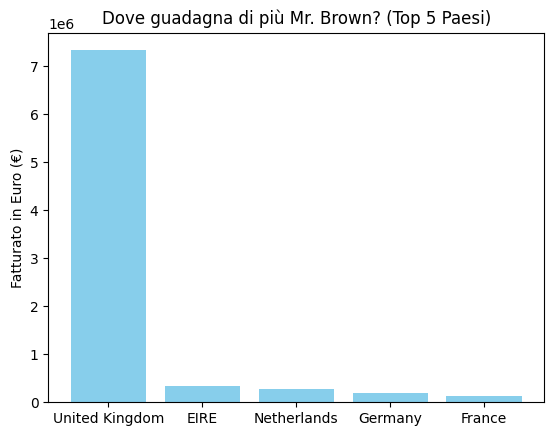

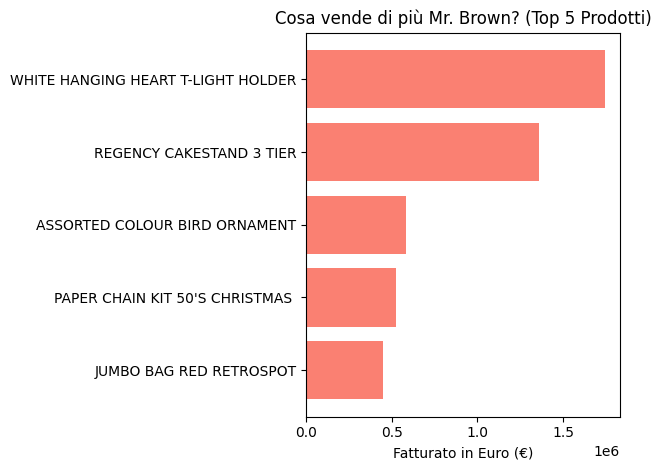

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carichiamo i risultati dal file Excel che abbiamo creato prima
percorso_risultati = '/content/drive/MyDrive/Brown/risultati_finali_brown.xlsx'
df_paesi = pd.read_excel(percorso_risultati, sheet_name='Top 5 Paesi')
df_prodotti = pd.read_excel(percorso_risultati, sheet_name='Top 5 Prodotti')

# --- GRAFICO 1: I PAESI ---
plt.bar(df_paesi['Country'], df_paesi['Totale_Fatturato'], color='skyblue')
plt.title('Dove guadagna di più Mr. Brown? (Top 5 Paesi)')
plt.ylabel('Fatturato in Euro (€)')
plt.show()

# --- GRAFICO 2: I PRODOTTI (Orizzontale per leggere meglio i nomi) ---
plt.barh(df_prodotti['Description'], df_prodotti['Fatturato_Prodotto'], color='salmon')
plt.title('Cosa vende di più Mr. Brown? (Top 5 Prodotti)')
plt.xlabel('Fatturato in Euro (€)')
plt.gca().invert_yaxis() # Mette il più venduto in alto
plt.tight_layout() # Sistema i nomi per non farli tagliare
plt.show()